In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [9]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

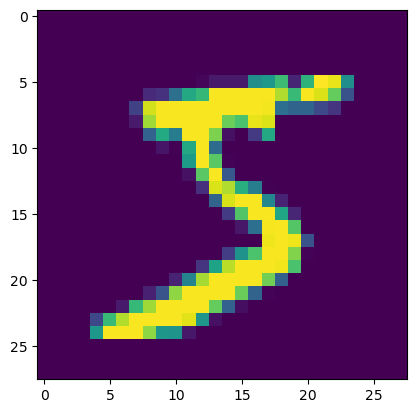

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [12]:
X_train=X_train/255
X_test=X_test/255



In [25]:
model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.1151 - val_accuracy: 0.9749
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.1360 - val_accuracy: 0.9713
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.1155 - val_accuracy: 0.9746
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.1344 - val_accuracy: 0.9713
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.1356 - val_accuracy: 0.9732
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.1302 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.1509 - val_accuracy:

In [21]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
y_pred=y_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9768

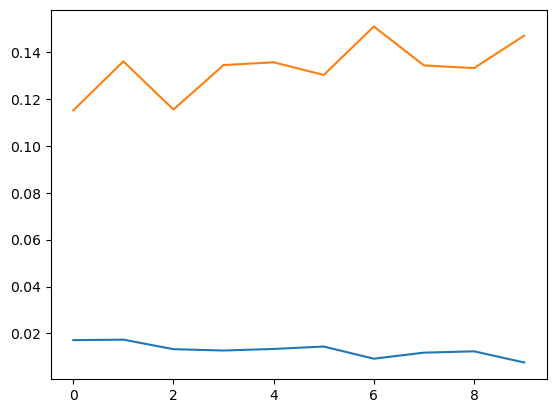

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

